# Home Assignment No. 2: Part 2 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

Before the start, read several additional recommendations.
* Probably you lauch `jupyter notebook` or `ipython notebook` from linux console. Try `jupyter lab` instead - it is a more convenient environment to work with notebooks.
* Probably the PC on which you are going to evaluate models has limited CPU/RAM Memory. In this case, we recommend to monitor the CPU and Memory Usage. To do this, you can execute `htop` (for CPU/RAM) or `free -s 0.2` (for RAM) in terminal.
* Probably tou have multiple Cores (CPU) on your PC. Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


## Model and feature selection

Let's load the dataset for this task.

In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
data_fs = pd.read_csv(r'data/data_fs.csv', low_memory=False)

Look at the first 10 rows of this dataset.

In [3]:
data_fs.head(10)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
5,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
6,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
7,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
8,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
9,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


The dataset has many NaN's and also a lot of categorical features. So at first, you should preprocess the data. We can deal with categorical features by using one-hot encoding. To do that we can use [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [4]:
# fill nan with 0
data_fs = data_fs.fillna(0)

# our goal is to predict the "price_doc" feature.
y = data_fs[["price_doc"]]
X = data_fs.drop("price_doc", axis=1)
X = X.drop("timestamp", axis=1)

# one-hot encoding
X = pd.get_dummies(X, sparse=True)

In [5]:
# Let's split our dataset into train 70 % and test 30% by using sklearn. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Look at first 10 rows what you get.
X_train.head(10)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,"child_on_acc_pre_school_3,013","child_on_acc_pre_school_7,311",modern_education_share_0,"modern_education_share_90,92","modern_education_share_93,08","modern_education_share_95,4918",old_education_build_share_0,"old_education_build_share_23,14","old_education_build_share_25,47","old_education_build_share_8,2517"
14065,46,44.0,7.0,25.0,1.0,2015.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
12978,77,48.0,17.0,17.0,4.0,2009.0,3.0,9.0,3.0,1.631523e+07,...,1,0,0,1,0,0,0,1,0,0
18695,39,18.0,7.0,17.0,1.0,0.0,1.0,9.0,0.0,5.293465e+06,...,0,0,0,0,1,0,0,0,1,0
26411,52,52.0,9.0,17.0,1.0,0.0,2.0,1.0,1.0,2.553630e+07,...,0,0,0,0,1,0,0,0,1,0
1419,30,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.641243e+06,...,0,1,1,0,0,0,1,0,0,0
29787,99,0.0,12.0,0.0,1.0,2015.0,4.0,1.0,1.0,4.441296e+06,...,0,0,0,0,0,1,0,0,0,1
18411,40,0.0,17.0,17.0,1.0,0.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
11541,31,17.0,1.0,9.0,2.0,1964.0,1.0,6.0,2.0,4.662813e+06,...,1,0,0,1,0,0,0,1,0,0
20741,55,0.0,6.0,0.0,1.0,0.0,2.0,12.0,1.0,6.677245e+07,...,0,0,0,0,1,0,0,0,1,0
13103,58,42.0,7.0,9.0,1.0,1974.0,3.0,6.0,2.0,4.389199e+06,...,1,0,0,1,0,0,0,1,0,0


Okay, now let's see how much data we have.

In [6]:
print("Train size =", X_train.shape)
print("Test size =", X_test.shape)

Train size = (21329, 560)
Test size = (9142, 560)


There are too many features in this dataset and not all of them are equally important for our problem. Besides, using the whole dataset as-is to train a linear model will, for sure, lead to overfitting. Instead of painful and time consuming manual selection of the most relevant data, we will use the methods of automatic feature selection.

<br>

But at first, we almost forgot to take a look at our targets. Let's plot `y_train` histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE3829ECF8>]],
      dtype=object)

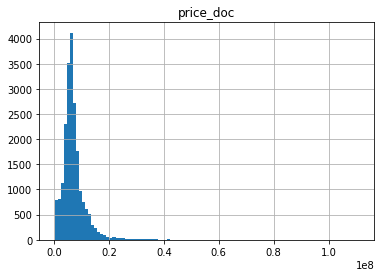

In [7]:
y_train.hist(bins=100)

There is a big variance in it and it's far from being a normal distribution. In the real-world problems it happens all the time: the data can be far from perfect. We can use some tricks to make it more like what we want.
In this particular case we can predict $\log y$ instead of $y$. This transformation is invertible, so we will be able to get our $y$ back.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE3829E748>]],
      dtype=object)

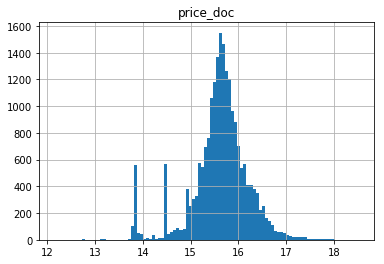

In [8]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_train_log.hist(bins=100)

Now it looks more like the data we want to deal with.

The preprocessing is finally over, so now we are ready for the actual task.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>

If you have difficulties with solving the below problems take a look at seminar $7$ on feature and model selection.

<br>

### Task 1 (1 pt.): Random forest feature importances

Use random forest to find the imortance of features. Plot the histogram.

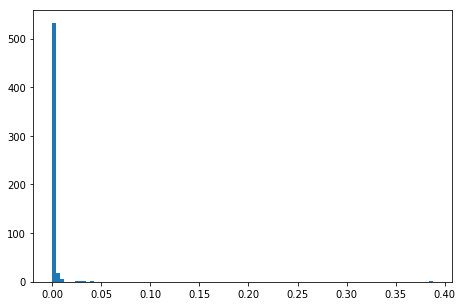

In [9]:
from sklearn.ensemble import RandomForestRegressor 

### BEGIN Solution
import warnings
warnings.simplefilter(action = 'ignore')
reg = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
reg.fit(X_train,y_train_log)
plt.figure(figsize=(7.5,5))
plt.hist(reg.feature_importances_, bins=100)
plt.show()
### END Solution

Print the 20 most important features and their **values**.

In [10]:
### BEGIN Solution
from IPython.display import display
a = list(zip(list(reg.feature_importances_),list(X_train.keys())))
top_20_features = sorted(a, reverse = True)[:20]
display(X_train[list(np.array(top_20_features)[:,1])].head())
print('(Importance, Feature label)')
top_20_features
### END Solution

,full_sq,sport_count_3000,cafe_count_3000,cafe_count_5000_price_2500,cafe_count_2000,ttk_km,cafe_count_5000,num_room,swim_pool_km,micex_cbi_tr,exhibition_km,eurrub,metro_min_avto,metro_km_avto,kindergarten_km,public_healthcare_km,brent,zd_vokzaly_avto_km,green_zone_part,cafe_count_5000_price_high
14065,46,1,5,1,2,14.298225,16,1.0,8.106936,244.71,7.402244,47.2639,4.721045,3.776836,0.286711,5.422551,107.88,24.061214,0.055644,0
12978,77,3,6,3,2,30.010070,7,3.0,22.523441,241.54,18.712429,45.1999,23.409854,19.391931,0.126951,19.151443,109.70,36.868718,0.375974,0
18695,39,29,98,36,33,3.247230,333,1.0,3.707560,244.85,1.235752,46.9807,1.426410,0.688338,0.685655,2.286509,110.55,9.119447,0.023464,1
26411,52,6,9,1,7,17.148737,20,2.0,2.521691,242.15,4.555385,80.0946,2.152792,1.722233,0.897889,2.052908,61.06,25.699461,0.496315,0
1419,30,50,326,181,112,0.638719,1244,0.0,0.501888,213.22,2.956832,38.8094,2.525458,1.521401,0.233241,0.749645,123.80,1.902312,0.015900,17


(Importance, Feature label)


[(0.38747670521912686, 'full_sq'),
 (0.04232870670615053, 'sport_count_3000'),
 (0.034589170014684825, 'cafe_count_3000'),
 (0.029250843150790577, 'cafe_count_5000_price_2500'),
 (0.02376260779025425, 'cafe_count_2000'),
 (0.010107237138299013, 'ttk_km'),
 (0.009910397163126557, 'cafe_count_5000'),
 (0.0094937474464798, 'num_room'),
 (0.008068903721671968, 'swim_pool_km'),
 (0.007987478552451752, 'micex_cbi_tr'),
 (0.007517462453607429, 'exhibition_km'),
 (0.0063868409956436435, 'eurrub'),
 (0.00601926209939347, 'metro_min_avto'),
 (0.0059801236928829216, 'metro_km_avto'),
 (0.005683561137005635, 'kindergarten_km'),
 (0.005353375999181198, 'public_healthcare_km'),
 (0.005336085262034558, 'brent'),
 (0.005264244624041344, 'zd_vokzaly_avto_km'),
 (0.005262679918544178, 'green_zone_part'),
 (0.004822302239678358, 'cafe_count_5000_price_high')]

<br>

### Task 2 (1 pt.)

On these 20 features train each of the following models
* **Linear Regression**
* **Ridge regression**
* **Random forest**
* **DecisionTree**

and test its performance using the **Root Mean Squared Logarithmic Error** (RMSLE).

In [11]:
from sklearn.metrics import mean_squared_log_error

You will need to do it for the next tasks too, so we recommend you to implement
a dedicated function for comparisons, which
1. on input the function takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)`
2. it trains **all of the listed models** on the `(X_train, y_train)` sample
3. it computes and returns a table the RMSLE score of each fitted model on the test dataset`(X_test, y_test)`

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
def comparator(X_train, y_train, X_test, y_test):
    """
    Parameters
    ==========
        X_train: ndarray - training inputs
        y_train: ndarray - training targets
        X_test: ndarray - test inputs
        y_test: ndarray - test targets
        
    Returns
    =======
        pd.DataFrame - table of RMSLE scores of each model on test and train datasets
    """
    methods = {
        "Linear Regression": sklearn.linear_model.LinearRegression(), 
        "Lasso": linear_model.Lasso(random_state = 0), 
        "Ridge": linear_model.Ridge(random_state = 0),
        "Dtree": sklearn.tree.DecisionTreeRegressor(random_state = 0),
        "RFR": sklearn.ensemble.RandomForestRegressor(n_estimators =100,random_state = 0)
    }

### BEGIN Solution

# From discussion on canvas in case of preventing double logarithm, I use mean_squared_error, but for input labels use log-scale labels for train and test sets.
    error_train = []
    error_test = []
    scale = StandardScaler()
    X_scaled_train  = scale.fit_transform(X_train)
    X_scaled_test  = scale.transform(X_test)
    
    for item in methods:
        reg = methods[item]
        reg.fit(X_scaled_train, y_train)
        #print( (reg.predict(X_scaled_train) )[0:100])
        error_train.append(mean_squared_error(y_train, reg.predict(X_scaled_train)))
        error_test.append(mean_squared_error(y_test, reg.predict(X_scaled_test)))
                          
### END Solution
    return pd.DataFrame({
        "Methods": list(methods.keys()),
        "Train loss": error_train,
        "Test loss": error_test
    })

Now apply this function

In [13]:
### BEGIN Solution
comparator(np.array(X_train[list(np.array(top_20_features)[:,1])]), y_train_log, np.array(X_test[list(np.array(top_20_features)[:,1])]), y_test_log)
### END Solution

,Methods,Train loss,Test loss
0,Linear Regression,0.281848,0.281745
1,Lasso,0.366336,0.363561
2,Ridge,0.281848,0.281745
3,Dtree,0.000024,0.436622
4,RFR,0.031116,0.225615


<br>

## Forward-backward methods

The idea is to add or remove features and look how it influences the value of the loss function or some other criteria.

Decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

### Task 3 (2 pt.): Implement forward method with early stopping

Implement the following greedy feature selection algorithm:

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unsued* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

### **<span style="color:red">ATTN</span>**
Use $k=3$ for the $k$-fold cv, because higher values could take a **lo-o-o-o-o-o-o-o-ong** time.

Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is**.

Please look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html).

In the cell below implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure model "quality".

In [14]:
from sklearn.metrics import make_scorer

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution
    indices = [i for i in range(X.shape[1])]
    for index in indices:
        if index not in used_features:
            scores[index] = -cross_val_score(model,X[:,used_features+[index]],y, cv = cv, scoring = 'neg_mean_squared_log_error').mean()
    ### END Solution

    return scores

In [15]:
def forward_steps(X, y, n_rounds, method):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        method: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution
    min_error_value = np.inf
    rnd = 0
    while rnd < n_rounds:
        if len(feat_best_list) == X.shape[1]:
            break
        else:
            scores = selection_step(method, X, y, feat_best_list)
            min_error_value_current = [min(scores.keys(), key=(lambda k: scores[k])),min(scores.values())]
            if min_error_value_current[1] <= min_error_value:
                min_error_value = min_error_value_current[1]
                feat_best_list.append(min_error_value_current[0])
                rnd = 0
                #print(feat_best_list, 'here', rnd, ' score', min_error_value)
            else:
                rnd += 1
                feat_best_list.append(min_error_value_current[0])
                #print(feat_best_list, 'there', rnd, 'score', min_error_value)
        
    ### END Solution
    
    return feat_best_list[:-rnd]


Use the function implemented above and use DecisionTreeRegressor to get the best features according to this algorithm and print them.

In [16]:
### BEGIN Solution
regr =  sklearn.tree.DecisionTreeRegressor(max_depth=10, random_state=42)
best_features = forward_steps(np.array(X_train),np.array(y_train_log), 2 , regr)
X_train[X_train.columns.values[best_features]].head()
### END Solution

,full_sq,ecology_no data,sub_area_Nekrasovka,cafe_count_1500_price_high,mosque_count_3000,sub_area_Zapadnoe Degunino,sub_area_Poselenie Vnukovskoe,sub_area_Poselenie Novofedorovskoe,sub_area_Nagatinskij Zaton,sub_area_Hamovniki,...,sub_area_Begovoe,sub_area_Shhukino,sub_area_Novokosino,sub_area_Mar'ina Roshha,sub_area_Juzhnoportovoe,sub_area_Vostochnoe Degunino,sub_area_Lefortovo,sub_area_Arbat,sub_area_Poselenie Krasnopahorskoe,sub_area_Sokol'niki
14065,46,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12978,77,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18695,39,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26411,52,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1419,30,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE score using these features. Remember the function you wrote earlier.

In [17]:
### BEGIN Solution
comparator(np.array(X_train[X_train.columns.values[best_features]]), y_train_log, np.array(X_test[X_test.columns.values[best_features]]), y_test_log)
### END Solution

,Methods,Train loss,Test loss
0,Linear Regression,0.312696,0.297768
1,Lasso,0.366336,0.363561
2,Ridge,0.312696,0.297769
3,Dtree,0.203390,0.263090
4,RFR,0.206148,0.247553


<br>

## Boosting: gradient boosting, adaboost


### Practical Boosting

In this task you are asked to implement a boosting algorithm, and compare speed of
different popular boosting libraries.

### Task 4 (2 pt.): Boosting Classification on a toy dataset

Let's generate a toy dataset for classification.

In [18]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)

Your task is:
1. Implement gradient boosting algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;
2. **Plot the decision boundary** on a $2$-d grid; 
3. Estimate the accuracy **score** on the test dataset, as well
as other classification metrics, that you can think of;
    
For basic implementation please refer to seminars $8-9$.

In [19]:
from sklearn.tree import DecisionTreeRegressor as reg
from tqdm import trange
from copy import deepcopy
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [20]:
### BEGIN Solution
#let's map labels:
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

def loss_logistic_grad(y, z):
    return (1 + np.exp(-y*z))**(-1)*y*np.exp(-y*z)


class GradientBoostingClassifier:
    def __init__(self, n_est, max_depth, learning_rate):
        self.n_est = n_est
        self.max_depth = max_depth
        self.prediction = ()
        self.learning_rate = learning_rate
        self.clf = [() for i in range(n_est)]
    
    
    def fit(self, X, y):
        self.prediction = np.zeros(X.shape[0])
        residuals = deepcopy(y)
        for i in trange(self.n_est):
            self.clf[i] = reg(max_depth=self.max_depth).fit(X,residuals)
            self.prediction += self.clf[i].predict(X)*self.learning_rate
            residuals = loss_logistic_grad(y,self.prediction)
        return 0
            
    
    def predict(self, X):
        predicted = np.zeros(X.shape[0])
        for i in range(self.n_est):
            predicted += (self.clf[i].predict(X))*self.learning_rate
        predicted = np.sign(predicted).astype(np.int)
        predicted[predicted == 0] = 1
        return predicted

### END Solution

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2043.00it/s]


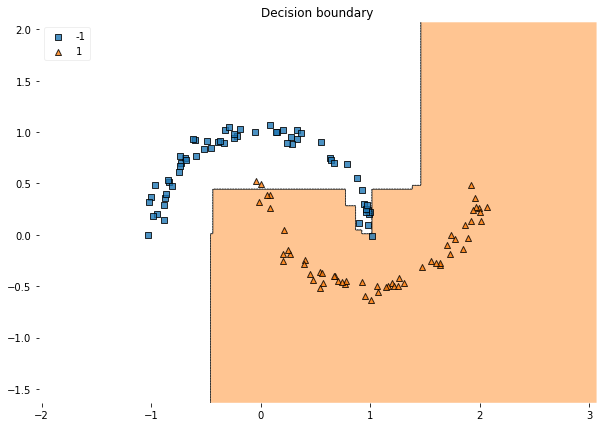

Accuracy: 0.975, Recall: 0.9655172413793104, Presicion: 0.9824561403508771


In [21]:
clf = GradientBoostingClassifier(n_est = 100, max_depth = 2, learning_rate = 0.3)
clf.fit(X_train,y_train)
plt.figure(figsize=(10,7))
plt.title("Decision boundary", size=12)
plot_decision_regions(X_test, y_test, clf = clf , legend = 2)
plt.show()
print('Accuracy: {}, Recall: {}, Presicion: {}'.format(str(accuracy_score(y_test, clf.predict(X_test))), str(recall_score(y_test, clf.predict(X_test))), str(precision_score(y_test, clf.predict(X_test)))))

<br/> <!--Intentionally left blank-->

### Task 5 (1 pt.): Measuring the Speed and Performance

Please make sure to install the following powerful packages for boosting:
* [xgboost](https://anaconda.org/conda-forge/xgboost)
* [lightgbm](https://anaconda.org/conda-forge/lightgbm)
* [catboost](https://tech.yandex.com/catboost/doc/dg/concepts/python-installation-docpage/)

In this task you are asked to compare the **training time** of the **GBDT**, the
Gradient Boosted Decision Trees, as implemeted by different popular ML libraries.
The dataset you shall use is the [UCI Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
You should study the parameters of each library and establish the **correspondence**
between them.

The plan is as follows:
1. Take the **default** parameter settings, measure the training time, and plot
the ROC curves;
2. Use grid search with the $3$-fold cross valiadation to choose the best model.
Then measure the training time as a function of (separately) **tree depth** and **the
number of estimators in the ensemble**, finally **plot the ROC** curves of the best
models.

You need to make sure that you are comparing **comparable** classifiers, i.e. with
**the same tree and ensemble hyperparameters**.

<span style="color:green">**NOTE**</span> You need figure out how to make parameter settings
compatible. One possible way to understand the correspondence is to study the docs. You may
choose the default parameters from any library.

Please plot **three** ROC curves, one per library, on the same **one plot**
with a *comprehensible [legend](https://matplotlib.org/users/legend_guide.html)*.

A useful command for timing is IPython's [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

In [24]:
### BEGIN Solution
import xgboost as xgb
import lightgbm as lgb
import catboost
from sklearn.metrics import roc_curve,roc_auc_score
import time
from sklearn.model_selection import GridSearchCV

In [25]:
#first part, using default parameter settings for xgb
xgb_clf = xgb.XGBClassifier(probability=True, learning_rate=0.1, max_depth = 3, n_estimators = 100)
%timeit xgb_clf.fit(X_train, y_train)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])

107 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
lgb_clf = lgb.LGBMClassifier(probability=True,  learning_rate=0.1, max_depth = 3, n_estimators = 100)
%timeit lgb_clf.fit(X_train, y_train)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_clf.predict_proba(X_test)[:, 1])

42.7 ms ± 800 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
cat_clf = catboost.CatBoostClassifier(verbose=False,  learning_rate=0.1, max_depth = 3, n_estimators = 100)
%timeit cat_clf.fit(X_train, y_train)
fpr_cat, tpr_cat, _ = roc_curve(y_test, cat_clf.predict_proba(X_test)[:, 1])

1.52 s ± 63.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


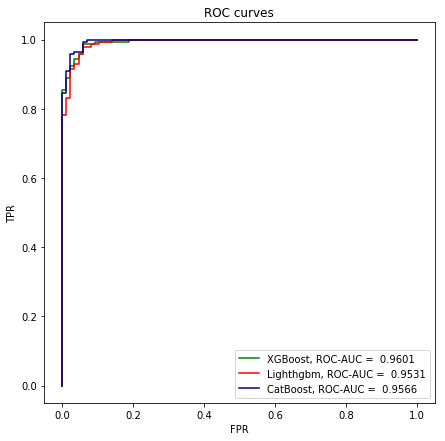

In [32]:
plt.figure(figsize = (7,7))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim = (-0.03, 1.03)
plt.ylim = (-0.03, 1.03)
plt.plot(fpr_xgb, tpr_xgb, color = 'green', label ='XGBoost, ROC-AUC =  {}'.format(round(roc_auc_score(y_test, xgb_clf.predict(X_test)),4)))
plt.plot(fpr_lgb, tpr_lgb, color = 'red', label ='Lighthgbm, ROC-AUC =  {}'.format(round(roc_auc_score(y_test, lgb_clf.predict(X_test)),4)))
plt.plot(fpr_cat, tpr_cat, color = 'navy', label ='CatBoost, ROC-AUC =  {}'.format(round(roc_auc_score(y_test, cat_clf.predict(X_test)),4)))
plt.legend()
plt.title('ROC curves')
plt.show()

In [33]:
classifiers =  {'xgb': xgb.XGBClassifier(loss_function = 'Logloss', probabiliy=True), 
                'lbg': lgb.LGBMClassifier(loss_function = 'Logloss', probabiliy=True), 
                'cat': catboost.CatBoostClassifier(loss_function = 'Logloss', verbose=False)}
fpr = {}
tpr = {}
parameters = {'max_depth': [1, 3,  5,  10],
              'n_estimators': [10, 50, 100, 150, 200]}
for clf in classifiers:
    cv_clf = GridSearchCV(classifiers[clf], param_grid=parameters, cv=3, scoring='roc_auc', verbose = 1)
    cv_clf.fit(X_train, y_train)
    fpr[clf], tpr[clf], _ = roc_curve(y_test, cv_clf.predict_proba(X_test)[:, 1])
    print('best parameters for ' + str(clf) + ' :', cv_clf.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.3s finished


best parameters for xgb : {'max_depth': 1, 'n_estimators': 200}
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.0s finished


best parameters for lbg : {'max_depth': 10, 'n_estimators': 100}
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.9min finished


best parameters for cat : {'max_depth': 3, 'n_estimators': 100}


In [34]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [10, 50, 100, 200, 500]
times_xgb_depth = []
times_lgb_depth = []
times_cat_depth = []
times_xgb_estimators = []
times_lgb_estimators = []
times_cat_estimators = []
for item in max_depth:
    clf_1 = xgb.XGBClassifier(loss_function = 'Logloss', n_estimators=500, max_depth = item, probabiliy=True, learning_rate=0.03)
    start_1 = time.time()
    clf_1.fit(X_train, y_train)
    end_1 = time.time()
    clf_2 = lgb.LGBMClassifier(loss_function = 'Logloss', n_estimators=500, max_depth = item, probabiliy=True, learning_rate=0.03)
    start_2 = time.time()
    clf_2.fit(X_train, y_train)
    end_2 = time.time()
    clf_3  = catboost.CatBoostClassifier(loss_function = 'Logloss', n_estimators=500, max_depth = item, verbose=False, learning_rate=0.03)
    start_3 = time.time()
    clf_3.fit(X_train, y_train)
    end_3 = time.time()
    times_xgb_depth.append(end_1 - start_1)
    times_lgb_depth.append(end_2 - start_2)
    times_cat_depth.append(end_3 - start_3)

for item in n_estimators:
    clf_4 = xgb.XGBClassifier(loss_function = 'Logloss', n_estimators=item, max_depth = 10, probabiliy=True, learning_rate=0.03)
    start_4 = time.time()
    clf_4.fit(X_train, y_train)
    end_4 = time.time()
    clf_5 = lgb.LGBMClassifier(loss_function = 'Logloss', n_estimators=item, max_depth = 10, probabiliy=True, learning_rate=0.03)
    start_5 = time.time()
    clf_5.fit(X_train, y_train)
    end_5 = time.time()
    clf_6  = catboost.CatBoostClassifier(loss_function = 'Logloss', n_estimators= item, max_depth = 10, verbose=False, learning_rate=0.03)
    start_6 = time.time()
    clf_6.fit(X_train, y_train)
    end_6 = time.time()
    times_xgb_estimators.append(end_4 - start_4)
    times_lgb_estimators.append(end_5 - start_5)
    times_cat_estimators.append(end_6 - start_6)

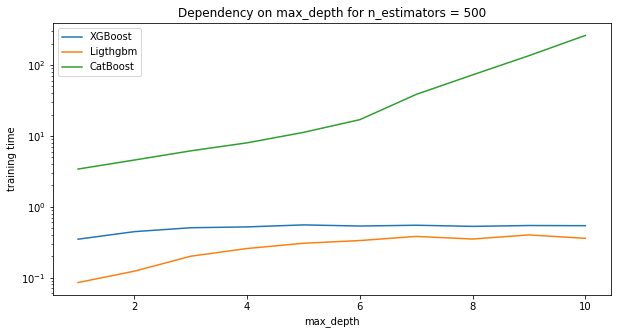

In [35]:
fig = plt.figure(figsize = (10,5))
plt.xlabel('max_depth')
plt.ylabel('training time')
plt.title('Dependency on max_depth for n_estimators = 500')
plt.semilogy(max_depth,times_xgb_depth, label = 'XGBoost')
plt.semilogy(max_depth,times_lgb_depth, label = 'Ligthgbm')
plt.semilogy(max_depth,times_cat_depth, label = 'CatBoost')
plt.legend()
plt.show()

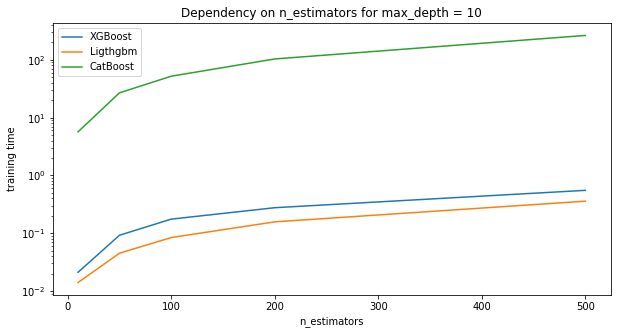

In [36]:
plt.figure(figsize = (10,5))
plt.title('Dependency on n_estimators for max_depth = 10')
plt.xlabel('n_estimators')
plt.ylabel('training time')
plt.semilogy(n_estimators,times_xgb_estimators, label = 'XGBoost')
plt.semilogy(n_estimators,times_lgb_estimators, label = 'Ligthgbm')
plt.semilogy(n_estimators,times_cat_estimators, label = 'CatBoost')
plt.legend()
plt.show()

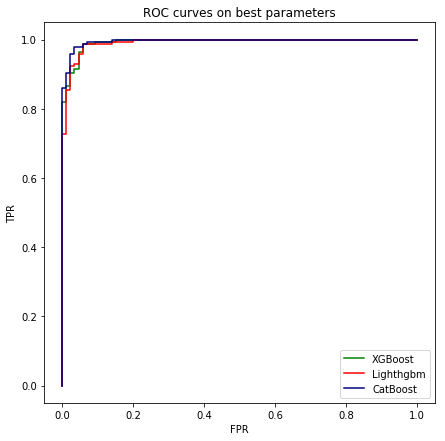

In [37]:
plt.figure(figsize = (7,7))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim = (-0.03, 1.03)
plt.ylim = (-0.03, 1.03)
plt.plot(fpr['xgb'], tpr['xgb'], color = 'green', label ='XGBoost')
plt.plot(fpr['lbg'], tpr['lbg'], color = 'red', label ='Lighthgbm')
plt.plot(fpr['cat'], tpr['cat'], color = 'navy', label ='CatBoost')
plt.legend()
plt.title('ROC curves on best parameters')
plt.show()

In [38]:
### END Solution

<br>

## NNs

### Task 6 (1 pt.): Activation functions (ADD DESCRIPTION)
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch realizations and their derivatives using autograd functionality:
* ReLU, ELU ($\alpha = 1$), Softplus ($\beta = 1$);
* Sign, Sigmoid, Softsign, Tanh.

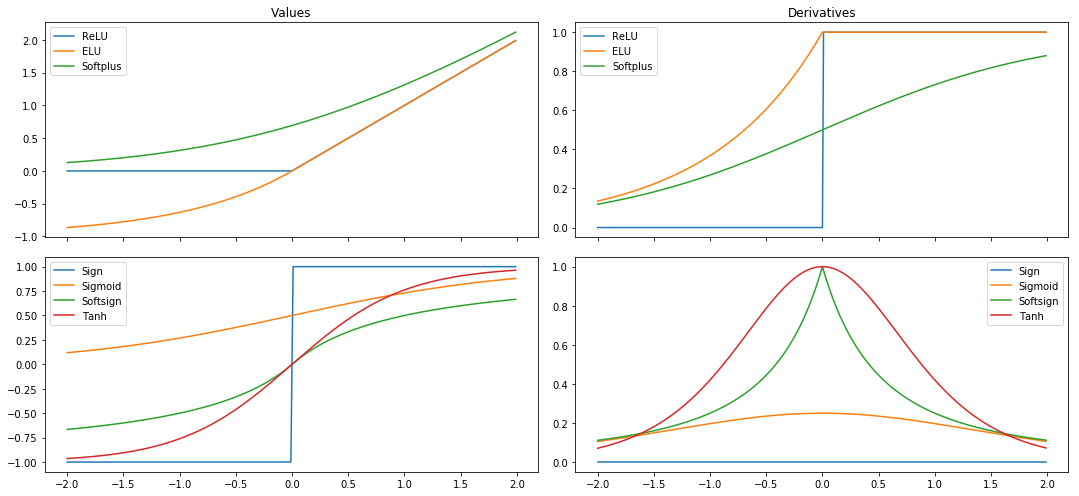

In [39]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch


x = torch.arange(-2, 2, .01, requires_grad=True)
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 7))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution
        # ...
        # axes[i, 0].plot('xs', 'function values', label=function_name)
        # axes[i, 1].plot('xs', 'derivative values', label=function_name)
        x.grad.zero_()
        xs = x.detach().numpy()
        function_values = activation(x).data.numpy()
        activation(x).sum().backward()
        derivative_values = x.grad.data.numpy()
        axes[i, 0].plot(xs, function_values, label = function_name)
        axes[i, 1].plot(xs, derivative_values , label=function_name)
        ### END Solution

    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

Answer the following questions. Which of these functions may be, and which -- definitely are a poor choise as an activation function in a neural network? Why?

Bad is sign(x) function, because there is no use of it in backpropagation, because it's have issues with derivative in zero point. What's more there is no value for it in recounting grad values in backprop, it gives no correction. Relu also bad for backpropagation, because if we want to calculate grads for negative values, we will receive 'dead neurons'.

### Task 7 (3 pt.): Backpropagation
At the seminar 10 on neural networks, we built an MLP with one hidden layer using our numpy implementations of linear layer and logistic and softmax activation functions. Your task is to
1. implement backpropagation for these modules,
2. train our numpy realization of MLP to classify the toy MNIST from `sklearn.datasets`.

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Prepare the dataset.

In [41]:
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]

input_size = 8*8
classes_n = 10

Implement the MLP with backprop.

In [42]:
class Linear:
    def __init__(self, input_size, output_size):
        self.thetas = np.random.randn(input_size, output_size)
        self.thetas_grads = np.empty(shape = self.thetas.shape)
        self.bias = np.random.randn(output_size)
        self.bias_grads = np.empty(shape = self.bias.shape)
        self.in_layer = ()
        self.out_layer = ()

    def forward(self, x): 
        self.in_layer = x
        output = np.matmul(x, self.thetas) + self.bias
        self.out_layer = output
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        input_grad = np.matmul(self.thetas, output_grad)
        # self.thetas_grads += 
        self.thetas_grads += np.matmul(self.in_layer.reshape(-1,1),output_grad.T)
        # self.bias_grads += 
        self.bias_grads += np.sum(output_grad,axis=1)
        ### END Solution
        return input_grad


class LogisticActivation:
    def __init__(self):
        self.in_layer = ()
        self.out_layer = ()

    def forward(self, x):
        self.in_layer = x
        output = 1/(1 + np.exp(-x))
        self.out_layer = output
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        input_grad =  self.out_layer.reshape(-1,1) * (1. - self.out_layer.reshape(-1,1)) * output_grad
        ### END Solution
        return input_grad
    

class SoftMaxActivation:
    def __init__(self):
        self.in_layer = ()
        self.out_layer = ()
        
    def forward(self, x):
        self.in_layer = x
        output = np.exp(x) / np.exp(x).sum(axis=-1, keepdims=True)
        self.out_layer = output
        return output
    
    
    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        out_vec = self.out_layer.reshape(-1,1)
        input_grad = out_vec * (1. - out_vec) * output_grad
        ### END Solution
        return input_grad
    

class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        self.activation2 = SoftMaxActivation()


    
    def forward(self, x):
        return self.activation2.forward(self.linear2.forward(self.activation1.forward(self.linear1.forward(x))))


    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate and update grads
        output_grad = self.linear1.backward(x,self.activation1.backward(x,self.linear2.backward(x,output_grad)))
        ### END Solution

In [43]:
### BEGIN Solution
# Please, implement here everything else you need, like the loss function.
def loss_func(pred, actual):
    actual_vec = np.zeros(shape = pred.shape)
    dim = pred.ndim
    if dim == 1:
        actual_vec[actual] = 1
        return -np.sum(actual_vec * np.log2(pred))
    else:
        vec = np.arange(len(actual))
        actual_vec[vec,actual] = 1
        return -np.sum(actual_vec * np.log2(pred), axis = 1)
    
    
    
def loss_func_grad(pred, actual):
    actual_vec = np.zeros(shape = pred.shape)
    actual_vec[actual] = 1
    out = pred - actual_vec
    return out.reshape(-1,1)

def zero(x):
    x = np.zeros(shape = x.shape)
    return x
### END Solution

Starting epoch 0 Starting epoch 10 Starting epoch 20 Starting epoch 30 Starting epoch 40 Starting epoch 50 Starting epoch 60 Starting epoch 70 Starting epoch 80 Starting epoch 90 Starting epoch 100 Starting epoch 110 Starting epoch 120 Starting epoch 130 Starting epoch 140 Starting epoch 150 Starting epoch 160 Starting epoch 170 Starting epoch 180 Starting epoch 190 

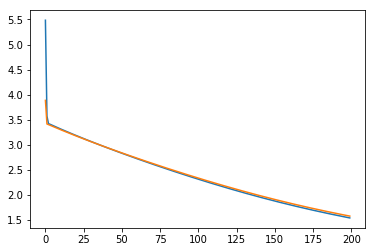

In [44]:
np.random.seed(0)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 200
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-3

for epoch in range(epochs_n):
    if epoch % 10 == 0:
        print('Starting epoch {}'.format(epoch), end=' ')
    for sample_i in range(train_size):
        x = x_train[sample_i]
        target = y_train[sample_i]

        ### BEGIN Solution
        # ... zero the gradients 
        mlp.linear1.thetas_grads = zero(mlp.linear1.thetas_grads)
        mlp.linear2.thetas_grads = zero(mlp.linear2.thetas_grads)
        mlp.linear1.bias_grads =  zero(mlp.linear1.bias_grads)
        mlp.linear2.bias_grads = zero(mlp.linear2.bias_grads)
        # prediction = mlp.forward(x)
        prediction = mlp.forward(x)
        # loss = # use cross entropy loss
        loss = loss_func(prediction, target)
        grad_loss = loss_func_grad(prediction, target)
        # learning_curve[epoch] += loss
        learning_curve[epoch] += loss
        # ... perform backward pass
        grad = mlp.backward(x, grad_loss)
        # ... update the weights simply with weight -= grad * learning_rate
        mlp.linear1.thetas -= mlp.linear1.thetas_grads * learning_rate
        mlp.linear2.thetas -= mlp.linear2.thetas_grads * learning_rate
        mlp.linear1.bias -= mlp.linear1.bias_grads * learning_rate
        mlp.linear2.bias -= mlp.linear2.bias_grads * learning_rate
    # learning_curve[epoch] /= train_size
    learning_curve[epoch] /= train_size
    # prediction = mlp.forward(x_test)
    pred = mlp.forward(x_test)
    # loss = # use cross entropy loss
    loss = loss_func(pred, y_test)
    test_curve[epoch] = loss.mean()
    # test_curve[epoch] = loss
    ### END Solution


plt.plot(learning_curve)
plt.plot(test_curve)

In [45]:
predictions = mlp.forward(digits).argmax(axis = 1)
#predictions[:20]
pd.DataFrame(confusion_matrix(targets, predictions))

,0,1,2,3,4,5,6,7,8,9
0,174,0,0,0,2,1,1,0,0,0
1,0,140,6,2,4,1,2,9,3,15
2,0,2,167,2,0,0,0,3,0,3
3,2,1,1,160,0,4,0,7,0,8
4,0,0,2,0,176,0,0,3,0,0
5,0,0,1,0,3,160,1,0,0,17
6,1,1,0,0,3,0,176,0,0,0
7,0,0,0,0,0,2,0,176,0,1
8,1,38,19,13,2,6,5,8,77,5
9,0,2,0,4,6,3,0,10,0,155


### Task 8 (3 pt.): Modelling real-life DL
In this task you will train your own CNN for dogs vs cats classification task. The goal of this task is not to get the highest accuracy possible (try getting the highest accuracy possible though) but to model the real-life process of training a deep neural network.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>
Training neural networks is a time consuming task and it can take days or even weeks. Try not to leave this task to the last day. It is not necessary for you to use GPU for this task, but using it may drastically reduce the time required for you to complete this task.

There is a good amount of datasets in [torchvision](https://pytorch.org/docs/stable/torchvision/datasets.html), but in practice, chances are that you wouldn't find the dataset for your particular problem, so you should be capable of writing `DataLoader` for your own dataset.

In [61]:
import torch
import pandas as pd
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, utils
import operator
import matplotlib.pyplot as plt
from tqdm import trange
import PIL.Image as Image
from IPython import display
import numpy as np
import random

Make sure you are using the right device.

In [62]:
print(torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))

cuda:0


First take a look at the data.

In [63]:
dt = pd.read_csv(r'data/cats_dogs/train.csv')
dt.head()

,path,y
0,cats_dogs/train/dogs/dog.342.jpg,1
1,cats_dogs/train/cats/cat.661.jpg,0
2,cats_dogs/train/cats/cat.516.jpg,0
3,cats_dogs/train/dogs/dog.938.jpg,1
4,cats_dogs/train/cats/cat.224.jpg,0


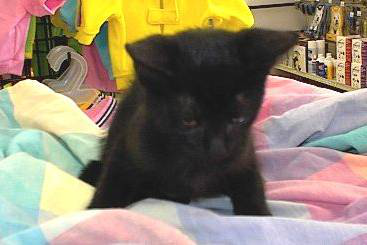

In [64]:
Image.open('data/' + dt['path'].iloc[1])

Implement your [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class.

In [65]:
class CatsDogs(Dataset):
    """Data's info collecting class"""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args: 
            csv_file: CSV-file with pathes and labels.
            root_dir: Root directory.
            transform: Transformations to be aplied on sample subset (default = None).
        """
        ### BEGIN Solution
        df = pd.read_csv(csv_file)
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
        ### END Solution
    

    def __getitem__(self, idx):
        ### BEGIN Solution
        # ... don't forget to augment your data for training, using the `transform` parameter of the constructor
        path = self.root_dir + self.df.iloc[idx, 0]
        img = Image.open(path).convert('L')
    
        y = self.df.iloc[idx, 1]

        if self.transform:
            img = self.transform(img)

        ### END Solution
        return img, torch.tensor(y)
    
    
    def __len__(self):
        ### BEGIN Solution
        return len(self.df)
        ### END Solution

Define the augmentation tranform and instantiate training and validation subsets of your `Dataset` and the correpsonding [`DataLoaders`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

In [66]:
train_transform = transforms.Compose([
        transforms.RandomRotation(5),
        transforms.RandomHorizontalFlip(),
        transforms.Resize([224, 224]),
        transforms.RandomAffine(degrees = 15, shear = 10, scale = (.7, 1.05)),
        transforms.ToTensor(),
    ])
    
val_transform = transforms.Compose([
        transforms.Resize([224, 224]),
        transforms.ToTensor(),
    ])


### BEGIN Solution
# dataset_train = 
dataset_train = CatsDogs(csv_file='data/cats_dogs/train.csv', root_dir='data/', transform=train_transform)
# dataset_val = 
dataset_val = CatsDogs(csv_file='data/cats_dogs/validation.csv', root_dir='data/', transform=val_transform)
# train_loader = 
train_loader = DataLoader(dataset_train, batch_size=50, shuffle=True)
# val_loader = 
val_loader = DataLoader(dataset_val, batch_size=5, shuffle=True)
### END Solution

Make sure that dataloader works as expected by observing one sample from it.

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor(1)


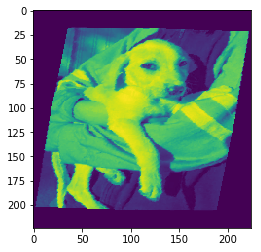

In [82]:
for X,y in train_loader:
    print(X[0])
    print(y[0])
    plt.imshow(np.array(X[0,0,:,:]))
    break

Implement your model below. You can use any layers that you want, but in general the structure of your model should be
1. convolutional feature extractor, followed by
2. fully-connected classifier.

In [69]:
class CNN(nn.Module):
    def __init__(self, inp_ch=1, outp_ch=2):
        super().__init__()
        ### BEGIN Solution

        self.stage1 = nn.Sequential(
            nn.Conv2d(in_channels=inp_ch, out_channels=4, kernel_size=3),
            nn.BatchNorm2d(4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=4, out_channels=6, kernel_size=4),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.stage2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=8, kernel_size=3),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=8, out_channels=12, kernel_size=3),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        # fully-connected classifier
        self.size = 12
        self.fc = nn.Sequential(
            nn.Linear(self.size*self.size*12, 2000),
            nn.BatchNorm1d(2000),
            nn.ReLU(),
            nn.Dropout(p=.65),  ## <---
            nn.Linear(2000, outp_ch))
        ### END Solution

    def forward(self, x):
        ### BEGIN Solution
        x = self.stage1(x)
        x = self.stage2(x)
        x = self.fc(x.view(-1, self.size*self.size*12))
        return x
        

Send your model to GPU, if you have it.

In [70]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [71]:
model = CNN().to(device)

Implement your loss function below, or use the predefined loss, suitable for this task.

In [72]:
### BEGIN Solution
# criterion = #
criterion = torch.nn.CrossEntropyLoss()
### END Solution

Try two different [optimizers](http://ruder.io/optimizing-gradient-descent/index.html) and choose one. For the optimizer of your choice, try two different sets of parameters (e.g learning rate). Explain both of your choices and back them with the learning performance of the network (see the rest of the task).

In this parts of the task you may try more than two options, but, please, leave in your solution only the results for two different optimizers and two different sets of parameters.

#### Choise of optimizers:
I've chosen 2 optimizers: adam and sgd optimizers. For second one I tried increasing learning rate, which will cause a faster decrease in loss rigth to local extremum, which will affect the learning abilities of the NN, in case that gradient boosting can have a situation not to come up with the extremum in case of big step (learning rate).

In [73]:
### BEGIN Solution
#optimizer = 
adam_optimizer = torch.optim.Adam(model.parameters())
sgd_optimizer1 = torch.optim.SGD(model.parameters(), lr=.1, momentum=0.9)
sgd_optimizer2 = torch.optim.SGD(model.parameters(), lr=.4, momentum=0.9)
### END Solution

You may finally train you model. Don't forget to:
1. monitor its training and validation performance *during training*, i.e plot the loss functions and prediction accuracy for train and validation sets, to make sure that your model doesn't learn complete nonsense; **do not** include tons of learning curves in your homework solution; (in real-life, you may find [`tensorboardX`](https://github.com/lanpa/tensorboardX) extremely useful for this task);
2. visualize its training and validation performance *after training*, to demonstrate that you have accomplished the task;
3. save the state of your model during the training, to use the best one at the end; you may find useful this [tutorial on saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html);
4. send the input and target data to the same device as your model.

Your model should be able to show *at least 75% validation accuracy*.

You may also find useful the following parts of documentation: [`Module.train`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.train), [`Module.eval`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.eval), [`Module.state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.state_dict), [`Module.load_state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.load_state_dict).

In [74]:
### BEGIN Solution
def train(model, optimizer, train_size, batch_size, device, scheduler=None, epochs_n=100, write = False, label = None):  ## <---
    model.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    learning_curve = [np.nan] * epochs_n
    train_accuracy_curve = [np.nan] * epochs_n
    val_accuracy_curve = [np.nan] * epochs_n
    max_val_accuracy = 0
    max_val_accuracy_epoch = 0

    batches_n = (train_size - 1) // batch_size + 1

    for epoch in trange(epochs_n):
        if scheduler is not None:  ## <---
            scheduler.step()       ## <---
        model.train()

        learning_curve[epoch] = 0
        for x, y in train_loader:
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            prediction = model(x)
            loss = criterion(prediction, y)
            learning_curve[epoch] += loss.item()
            loss.backward()
            optimizer.step()

        display.clear_output(wait=True)
        f, axes = plt.subplots(1, 2, figsize=(15, 3))

        learning_curve[epoch] /= batches_n
        axes[0].plot(learning_curve)

        model.eval()
        train_accuracy_curve[epoch] = get_accuracy(model, train_loader, device)
        val_accuracy_curve[epoch] = get_accuracy(model, val_loader, device)
        
        val_accuracy = val_accuracy_curve[epoch]
        if val_accuracy > max_val_accuracy:
            max_val_accuracy = val_accuracy
            max_val_accuracy_epoch = epoch
            if write:
                torch.save(model.state_dict(), './'+label+'_best_params.pt')
        
        axes[1].set_title('Train {:.4f}, val {:.4f}, max val {:.4f} at {}'.format(
            train_accuracy_curve[epoch], val_accuracy, max_val_accuracy, max_val_accuracy_epoch))
        axes[1].plot(train_accuracy_curve)
        axes[1].plot(val_accuracy_curve)

        plt.tight_layout()
        plt.show()
        
def set_random_seeds(seed_value=0, device = 0):
    '''source https://forums.fast.ai/t/solved-reproducibility-where-is-the-randomness-coming-in/31628/5'''
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    random.seed(seed_value)
    if device != 'cpu': 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

def get_accuracy(model, dataloader, device):
    correct = 0
    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)  ## <---
            y = y.to(device)  ## <---
            prediction = model(x).argmax(dim=-1, keepdim=True)
            correct += prediction.eq(y.view_as(prediction)).sum().item()
    return correct / len(dataloader.dataset)

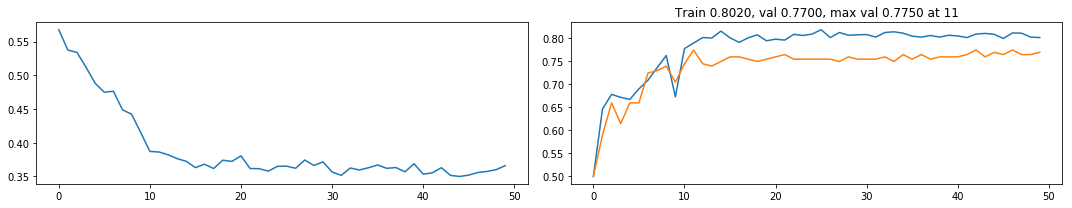



100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [15:21<00:00, 18.33s/it]



In [75]:
set_random_seeds(device=device)
scheduler = torch.optim.lr_scheduler.MultiStepLR(adam_optimizer, (10, 15, ), gamma=.1)  
train(model, adam_optimizer, train_size=len(dataset_train), batch_size=40, device=device, scheduler=scheduler, epochs_n=50, write = True, label = 'adam')

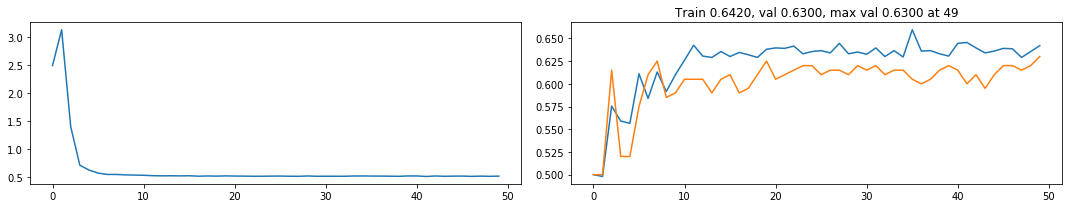



100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [15:11<00:00, 17.94s/it]



In [76]:
set_random_seeds(device=device)
scheduler = torch.optim.lr_scheduler.MultiStepLR(sgd_optimizer1, (10, 15, ), gamma=.1)  
train(model, sgd_optimizer1, train_size=len(dataset_train), batch_size=40, device=device, scheduler=scheduler, epochs_n=50, write = True, label='sgd1')

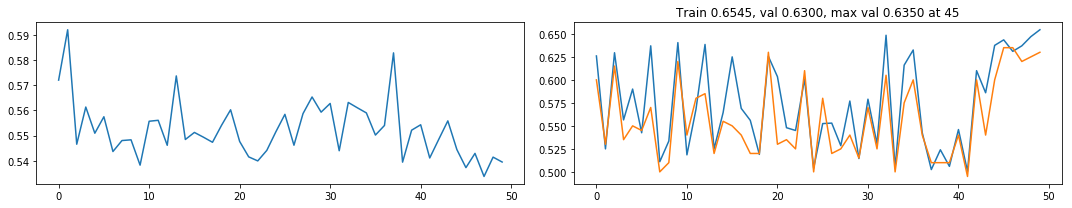




100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [15:12<00:00, 18.57s/it]




In [78]:
set_random_seeds(device=device)
scheduler = torch.optim.lr_scheduler.MultiStepLR(sgd_optimizer1, (10, 15, ), gamma=.1)  
train(model, sgd_optimizer2, train_size=len(dataset_train), batch_size=40, device=device, scheduler=scheduler, epochs_n=50, write = True, label = 'sgd2')

In [79]:
file = './adam_best_params.pt' #loading best parameters from output files, respresented in archive. 
model = CNN().to(device)
model.load_state_dict(torch.load(file))
model.eval()

CNN(
  (stage1): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 6, kernel_size=(4, 4), stride=(1, 1))
    (5): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (stage2): Sequential(
    (0): Conv2d(6, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(8, 12, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, p

### Task 9 (1 pt.): Bad activation function
Using your conclusions from the <span style="color:red;">Task 6</span>, choose the worst activation function and replace all activations in your model from the previous <span style="color:red;">Task 8</span> with this one. Demonstrate the training and validation performance of this version of the model.

One among the worst is Softsign(x), because it's derivative is neither conver, nor concave. That is why it's bad especially for backpropagation procedure.

In [80]:
class bad_CNN(nn.Module):
    def __init__(self, inp_ch=1, outp_ch=2):
        super().__init__()
        ### BEGIN Solution

        self.stage1 = nn.Sequential(
            nn.Conv2d(in_channels=inp_ch, out_channels=4, kernel_size=3),
            nn.BatchNorm2d(4),
            nn.Softsign(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=4, out_channels=6, kernel_size=4),
            nn.BatchNorm2d(6),
            nn.Softsign(),
            nn.MaxPool2d(kernel_size=2))
        
        self.stage2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=8, kernel_size=3),
            nn.BatchNorm2d(8),
            nn.Softsign(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=8, out_channels=12, kernel_size=3),
            nn.BatchNorm2d(12),
            nn.Softsign(),
            nn.MaxPool2d(kernel_size=2))
        
        # fully-connected classifier
        self.size = 12
        self.fc = nn.Sequential(
            nn.Linear(self.size*self.size*12, 1000),
            nn.BatchNorm1d(1000),
            nn.Softsign(),
            nn.Dropout(p=.6),  ## <---
            nn.Linear(1000, outp_ch))
        ### END Solution

    def forward(self, x):
        ### BEGIN Solution
        x = self.stage1(x)
        x = self.stage2(x)
        x = self.fc(x.view(-1, self.size*self.size*12))
        return x

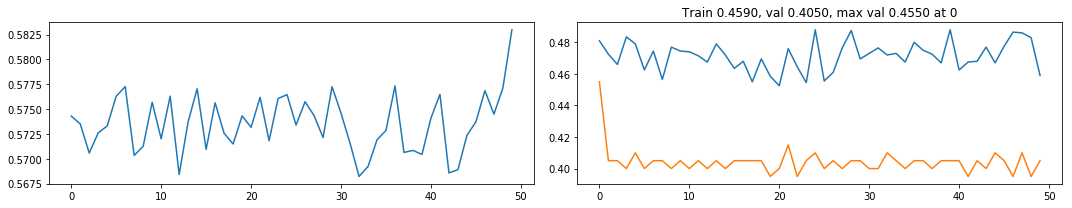




100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [15:24<00:00, 18.32s/it]




In [81]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = bad_CNN().to(device)
set_random_seeds(device=device)
scheduler = torch.optim.lr_scheduler.MultiStepLR(sgd_optimizer1, (10, 15, ), gamma=.1)  
train(model, sgd_optimizer1, train_size=len(dataset_train), batch_size=40, device=device, scheduler=scheduler, epochs_n=50, write = True, label = 'sign')